# Goals

* Explore the impact of a learning rate alpha on gradient descent
* Improve performance of gradient descent by feature scaling using z-score normalisation. 

# Tools

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from lab_utils_multi import load_house_data, run_gradient_descent
from lab_utils_multi import norm_plot, plt_equal_scale, plot_cost_i_w
from lab_utils_common import dlc
np.set_printoptions(precision = 2)
plt.style.use('./deeplearning.mplstyle')

# Problem Statement

The dataset consists of 4 features: 
* size
* num. of bedrooms
* num. of floor
* age of home

There is 1 target value: 
* price (thousands of dollars)


In [4]:
# Load the dataset
X_train, y_train = load_house_data()
X_features = ['size(sqft)', 'bedrooms', 'floors', 'age']

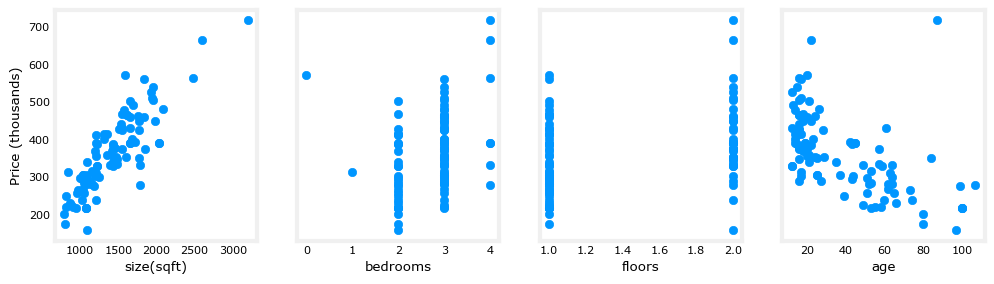

In [6]:
# View dataset
fig, ax = plt.subplots(1, 4, figsize = (12, 3), sharey = True)
for i in range(len(ax)):
    ax[i].scatter(X_train[:,i], y_train)
    ax[i].set_xlabel(X_features[i])
ax[0].set_ylabel("Price (thousands)")
plt.show()

# Gradient Descent with Multiple Variables 

## Learning rate

### Alpha = 9.9e-7

In [7]:
# Alpha = 9.9e-7 (tiny)
_, _, hist = run_gradient_descent(X_train, y_train, 10, alpha = 9.9e-7)

Iteration Cost          w0       w1       w2       w3       b       djdw0    djdw1    djdw2    djdw3    djdb  
---------------------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|
        0 9.55884e+04  5.5e-01  1.0e-03  5.1e-04  1.2e-02  3.6e-04 -5.5e+05 -1.0e+03 -5.2e+02 -1.2e+04 -3.6e+02
        1 1.28213e+05 -8.8e-02 -1.7e-04 -1.0e-04 -3.4e-03 -4.8e-05  6.4e+05  1.2e+03  6.2e+02  1.6e+04  4.1e+02
        2 1.72159e+05  6.5e-01  1.2e-03  5.9e-04  1.3e-02  4.3e-04 -7.4e+05 -1.4e+03 -7.0e+02 -1.7e+04 -4.9e+02
        3 2.31358e+05 -2.1e-01 -4.0e-04 -2.3e-04 -7.5e-03 -1.2e-04  8.6e+05  1.6e+03  8.3e+02  2.1e+04  5.6e+02
        4 3.11100e+05  7.9e-01  1.4e-03  7.1e-04  1.5e-02  5.3e-04 -1.0e+06 -1.8e+03 -9.5e+02 -2.3e+04 -6.6e+02
        5 4.18517e+05 -3.7e-01 -7.1e-04 -4.0e-04 -1.3e-02 -2.1e-04  1.2e+06  2.1e+03  1.1e+03  2.8e+04  7.5e+02
        6 5.63212e+05  9.7e-01  1.7e-03  8.7e-04  1.8e-02  6.6e-04 -1.3e+06 -2.5e+03 -1.3e+03 -3.1e+04 -

Note: Cost increases as alpha are too large. The derivatives are alternating sign, indicating that the cost jumps across "the valley" of the quadratic cost function. 

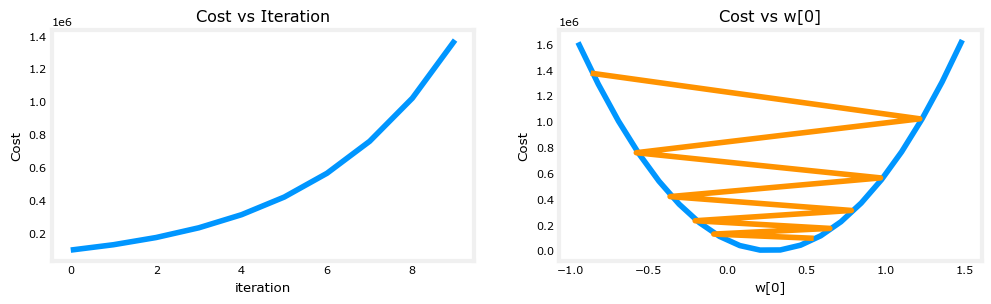

In [8]:
plot_cost_i_w(X_train, y_train, hist)

### Slightly smaller Alpha = 9e-7

In [9]:
# Slightly smaller Alpha = 9e-7
_,_,hist = run_gradient_descent(X_train, y_train, 10, alpha = 9e-7)

Iteration Cost          w0       w1       w2       w3       b       djdw0    djdw1    djdw2    djdw3    djdb  
---------------------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|
        0 6.64616e+04  5.0e-01  9.1e-04  4.7e-04  1.1e-02  3.3e-04 -5.5e+05 -1.0e+03 -5.2e+02 -1.2e+04 -3.6e+02
        1 6.18990e+04  1.8e-02  2.1e-05  2.0e-06 -7.9e-04  1.9e-05  5.3e+05  9.8e+02  5.2e+02  1.3e+04  3.4e+02
        2 5.76572e+04  4.8e-01  8.6e-04  4.4e-04  9.5e-03  3.2e-04 -5.1e+05 -9.3e+02 -4.8e+02 -1.1e+04 -3.4e+02
        3 5.37137e+04  3.4e-02  3.9e-05  2.8e-06 -1.6e-03  3.8e-05  4.9e+05  9.1e+02  4.8e+02  1.2e+04  3.2e+02
        4 5.00474e+04  4.6e-01  8.2e-04  4.1e-04  8.0e-03  3.2e-04 -4.8e+05 -8.7e+02 -4.5e+02 -1.1e+04 -3.1e+02
        5 4.66388e+04  5.0e-02  5.6e-05  2.5e-06 -2.4e-03  5.6e-05  4.6e+05  8.5e+02  4.5e+02  1.2e+04  2.9e+02
        6 4.34700e+04  4.5e-01  7.8e-04  3.8e-04  6.4e-03  3.2e-04 -4.4e+05 -8.1e+02 -4.2e+02 -9.8e+03 -

Note: Cost is not increasing, but decreasing in a small manner. Derivative still alternate sign, indicating this "jumping across the valley" behavior. 

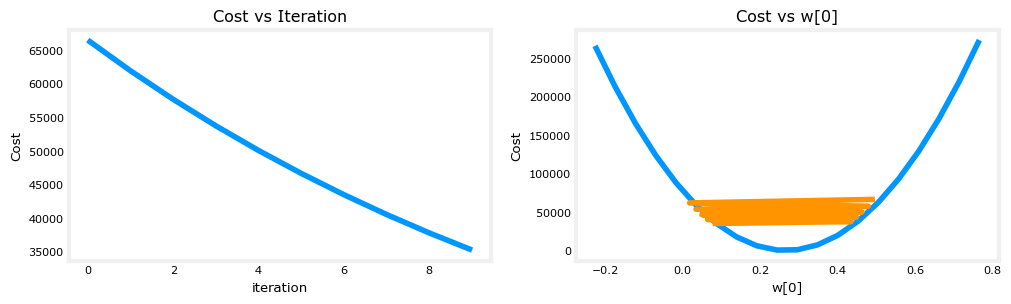

In [10]:
plot_cost_i_w(X_train, y_train, hist)

### Much smaller Alpha = 1e-7

In [11]:
# Much smaller Alpha = 1e-7
_,_,hist = run_gradient_descent(X_train, y_train, 10, alpha = 1e-7)

Iteration Cost          w0       w1       w2       w3       b       djdw0    djdw1    djdw2    djdw3    djdb  
---------------------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|
        0 4.42313e+04  5.5e-02  1.0e-04  5.2e-05  1.2e-03  3.6e-05 -5.5e+05 -1.0e+03 -5.2e+02 -1.2e+04 -3.6e+02
        1 2.76461e+04  9.8e-02  1.8e-04  9.2e-05  2.2e-03  6.5e-05 -4.3e+05 -7.9e+02 -4.0e+02 -9.5e+03 -2.8e+02
        2 1.75102e+04  1.3e-01  2.4e-04  1.2e-04  2.9e-03  8.7e-05 -3.4e+05 -6.1e+02 -3.1e+02 -7.3e+03 -2.2e+02
        3 1.13157e+04  1.6e-01  2.9e-04  1.5e-04  3.5e-03  1.0e-04 -2.6e+05 -4.8e+02 -2.4e+02 -5.6e+03 -1.8e+02
        4 7.53002e+03  1.8e-01  3.3e-04  1.7e-04  3.9e-03  1.2e-04 -2.1e+05 -3.7e+02 -1.9e+02 -4.2e+03 -1.4e+02
        5 5.21639e+03  2.0e-01  3.5e-04  1.8e-04  4.2e-03  1.3e-04 -1.6e+05 -2.9e+02 -1.5e+02 -3.1e+03 -1.1e+02
        6 3.80242e+03  2.1e-01  3.8e-04  1.9e-04  4.5e-03  1.4e-04 -1.3e+05 -2.2e+02 -1.1e+02 -2.3e+03 -

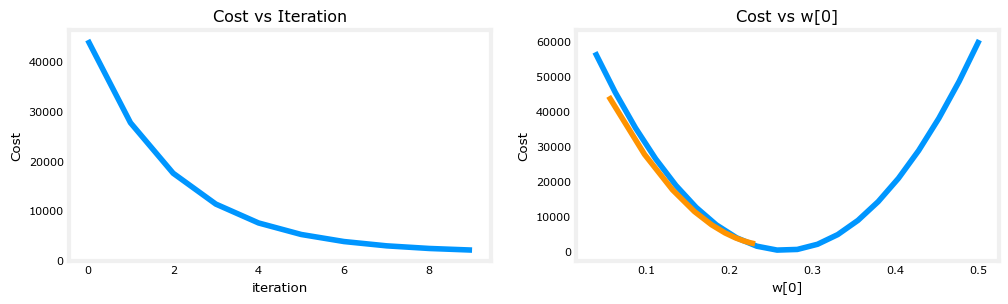

In [12]:
plot_cost_i_w(X_train,y_train,hist)

Note: Better alpha. Decreasing cost and no jumping

## Feature scaling

### Z-score normalisation

In [16]:
# Assume the data has a mean of 0 and a standard deviation of 1
def zscore_normalize_features(X): 
    """
    Computes X, zscore normalised by column

    Args:
        X (ndarray (m,n)): input data, m examples, n features

    Returns:
        X_norm (ndarray(m,n)): input normalised
        mu (ndarray(n,))     : mean of each feature
        sigma (ndarray(n,))  : standard deviation of each feature 
    """
    # Find mean of each feature 
    mu = np.mean(X, axis = 0)   # size 4
    # Find std of each feature
    sigma = np.std(X, axis = 0)   # size 4
    X_norm = (X - mu) / sigma    # size inf, 4

    return X_norm, mu, sigma

In [26]:
# Make no assumptions of the data and scale with the mean and max, min range
def mean_normalize_features(X):
    """
    Computes X, the mean normalised by column
    Args: 
        X (ndarray (m,n)): input data, m examples, n features
    Returns: 
        X_norm (ndarray(m,n)): normalised version of input
        mu (ndarray(n,))     : mean of each feature
        X_min (ndarray(n,))  : the minimum of each feature
        X_max (ndarray(n,))  : the maximum of each feature 
    """
    # Mean of each feature
    mu = np.mean(X, axis = 0)
    # Min and Max
    X_min = np.min(X, axis = 0)
    X_max = np.max(X, axis = 0)
    # Calculate normalised raw data
    X_norm = (X - mu) / (X_max - X_min)

    return X_norm, mu, X_min, X_max

In [28]:
# Simple scaling
def range_scale_normalize_features(X):
    """
    Computes X, the mean normalised by column
    Args: 
        X (ndarray (m,n)): input data, m examples, n features
    Returns: 
        X_norm (ndarray(m,n)): normalised version of input
        X_max (ndarray(n,))  : the maximum of each feature 
    """
    # Max
    X_max = np.max(X, axis = 0)
    # Calculate normalised raw data
    X_norm = X / X_max

    return X_norm, X_max

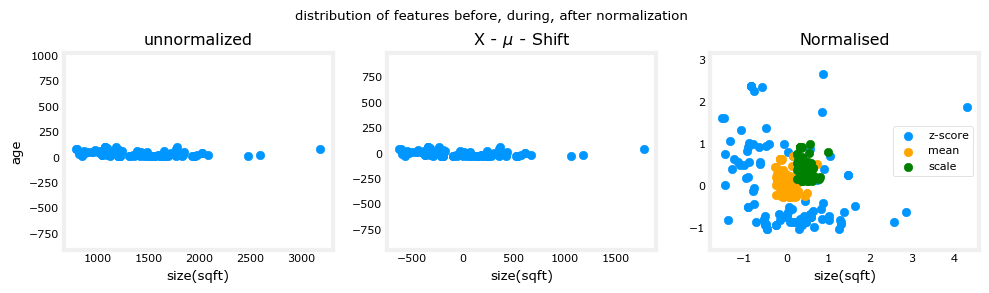

In [33]:
# Visualise 
mu     = np.mean(X_train,axis=0)   
sigma  = np.std(X_train,axis=0) 
X_mean = (X_train - mu)
X_norm_z = (X_train - mu)/sigma  
X_norm_mean, _, _, _, = mean_normalize_features(X_train)
X_norm_scale, _, = range_scale_normalize_features(X_train)

fig,ax=plt.subplots(1, 3, figsize=(10, 3))
ax[0].scatter(X_train[:,0], X_train[:,3])
ax[0].set_xlabel(X_features[0]); ax[0].set_ylabel(X_features[3]);
ax[0].set_title("unnormalized")
ax[0].axis('equal')

ax[1].scatter(X_mean[:,0], X_mean[:,3])
ax[1].set_xlabel(X_features[0]); ax[0].set_ylabel(X_features[3]);
ax[1].set_title(r"X - $\mu$ - Shift")
ax[1].axis('equal')

ax[2].scatter(X_norm_z[:,0], X_norm[:,3], label = "z-score")
ax[2].scatter(X_norm_mean[:,0], X_norm_mean[:,3], color = "orange", label = "mean")
ax[2].scatter(X_norm_scale[:,0], X_norm_scale[:,3], color = "green", label = "scale")
ax[2].legend()

ax[2].set_xlabel(X_features[0]); ax[0].set_ylabel(X_features[3]);
ax[2].set_title(r"Normalised")
ax[2].axis('equal')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
fig.suptitle("distribution of features before, during, after normalization")
plt.show()

In [34]:
# Find values of normalisation
X_norm_z, X_mu, X_sigma = zscore_normalize_features(X_train)
print(f"X_mu = {X_mu}, \nX_sigma = {X_sigma}") # 4 averages, 4 standard deviations
print(f"Peak to Peak range by column in Raw        X:{np.ptp(X_train,axis=0)}")   # Raw ranges are large or small
print(f"Peak to Peak range by column in Normalized X:{np.ptp(X_norm,axis=0)}")    # Normalises ranges are much smaller (<10)

X_mu = [1.42e+03 2.72e+00 1.38e+00 3.84e+01], 
X_sigma = [411.62   0.65   0.49  25.78]
Peak to Peak range by column in Raw        X:[2.41e+03 4.00e+00 1.00e+00 9.50e+01]
Peak to Peak range by column in Normalized X:[5.85 6.14 2.06 3.69]


### Distributions before and after normalisation

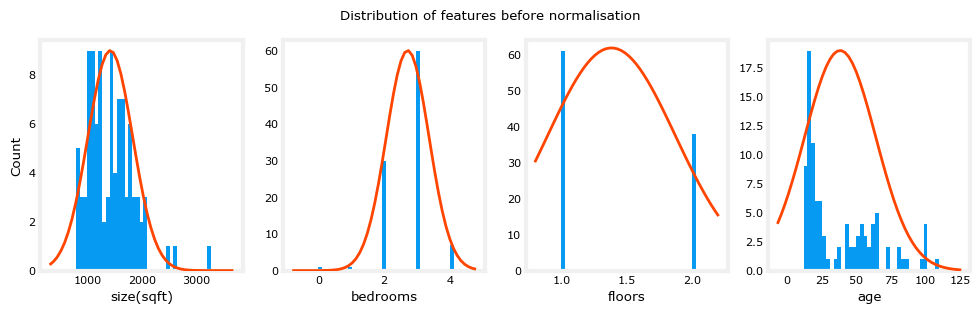

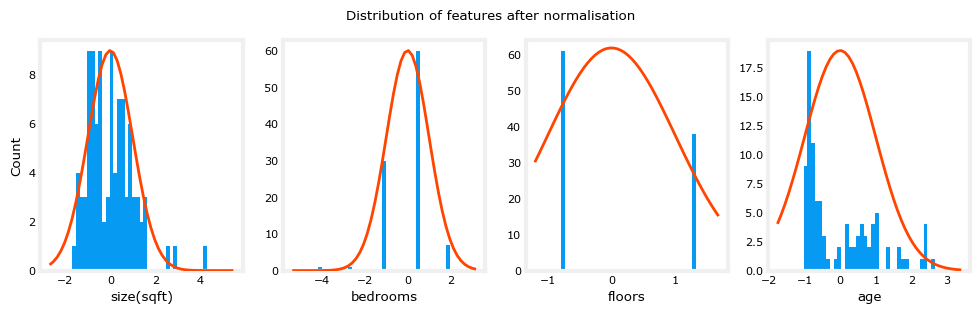

In [35]:
# Visualise 
fig, ax = plt.subplots(1, 4, figsize = (12, 3))
for i in range(len(ax)): 
    norm_plot(ax[i], X_train[:,i],)
    ax[i].set_xlabel(X_features[i])
ax[0].set_ylabel("Count");
fig.suptitle("Distribution of features before normalisation")
plt.show()

fig, ax = plt.subplots(1, 4, figsize = (12, 3))
for i in range(len(ax)):
    norm_plot(ax[i], X_norm[:,i],)
    ax[i].set_xlabel(X_features[i])
ax[0].set_ylabel("Count");
fig.suptitle("Distribution of features after normalisation")
plt.show()

Distributions do not change. The ranges are reduced. 

### Rerun with normalised data at alpha = 1e-7

In [42]:
alpha = 1.0e-7
w_norm_z, b_norm_z, hist_z = run_gradient_descent(X_norm_z, y_train, 1000, alpha, )

Iteration Cost          w0       w1       w2       w3       b       djdw0    djdw1    djdw2    djdw3    djdb  
---------------------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|
        0 7.13692e+04  8.9e-06  3.0e-06  3.3e-06 -6.0e-06  3.6e-05 -8.9e+01 -3.0e+01 -3.3e+01  6.0e+01 -3.6e+02
      100 7.13678e+04  9.0e-04  3.0e-04  3.3e-04 -6.0e-04  3.7e-03 -8.9e+01 -3.0e+01 -3.3e+01  6.0e+01 -3.6e+02
      200 7.13663e+04  1.8e-03  5.9e-04  6.6e-04 -1.2e-03  7.3e-03 -8.9e+01 -3.0e+01 -3.3e+01  6.0e+01 -3.6e+02
      300 7.13648e+04  2.7e-03  8.9e-04  9.9e-04 -1.8e-03  1.1e-02 -8.9e+01 -3.0e+01 -3.3e+01  6.0e+01 -3.6e+02
      400 7.13634e+04  3.6e-03  1.2e-03  1.3e-03 -2.4e-03  1.5e-02 -8.9e+01 -3.0e+01 -3.3e+01  6.0e+01 -3.6e+02
      500 7.13619e+04  4.5e-03  1.5e-03  1.6e-03 -3.0e-03  1.8e-02 -8.9e+01 -3.0e+01 -3.3e+01  6.0e+01 -3.6e+02
      600 7.13605e+04  5.4e-03  1.8e-03  2.0e-03 -3.6e-03  2.2e-02 -8.9e+01 -3.0e+01 -3.3e+01  6.0e+01 -

In [43]:
w_norm_m, b_norm_m, hist_m = run_gradient_descent(X_norm_mean, y_train, 1000, alpha, )

Iteration Cost          w0       w1       w2       w3       b       djdw0    djdw1    djdw2    djdw3    djdb  
---------------------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|
        0 7.13692e+04  1.5e-06  4.8e-07  1.6e-06 -1.6e-06  3.6e-05 -1.5e+01 -4.8e+00 -1.6e+01  1.6e+01 -3.6e+02
      100 7.13679e+04  1.5e-04  4.9e-05  1.6e-04 -1.6e-04  3.7e-03 -1.5e+01 -4.8e+00 -1.6e+01  1.6e+01 -3.6e+02
      200 7.13666e+04  3.1e-04  9.7e-05  3.2e-04 -3.3e-04  7.3e-03 -1.5e+01 -4.8e+00 -1.6e+01  1.6e+01 -3.6e+02
      300 7.13652e+04  4.6e-04  1.4e-04  4.8e-04 -4.9e-04  1.1e-02 -1.5e+01 -4.8e+00 -1.6e+01  1.6e+01 -3.6e+02
      400 7.13639e+04  6.1e-04  1.9e-04  6.4e-04 -6.5e-04  1.5e-02 -1.5e+01 -4.8e+00 -1.6e+01  1.6e+01 -3.6e+02
      500 7.13626e+04  7.6e-04  2.4e-04  8.0e-04 -8.1e-04  1.8e-02 -1.5e+01 -4.8e+00 -1.6e+01  1.6e+01 -3.6e+02
      600 7.13613e+04  9.2e-04  2.9e-04  9.6e-04 -9.7e-04  2.2e-02 -1.5e+01 -4.8e+00 -1.6e+01  1.6e+01 -

Note: Cost is higher than with unnormalised data.

In [44]:
w_norm_s, b_norm_s, hist_s = run_gradient_descent(X_norm_scale, y_train, 1000, alpha, )

Iteration Cost          w0       w1       w2       w3       b       djdw0    djdw1    djdw2    djdw3    djdb  
---------------------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|
        0 7.13692e+04  1.7e-05  2.5e-05  2.6e-05  1.2e-05  3.6e-05 -1.7e+02 -2.5e+02 -2.6e+02 -1.2e+02 -3.6e+02
      100 7.13661e+04  1.7e-03  2.5e-03  2.6e-03  1.2e-03  3.7e-03 -1.7e+02 -2.5e+02 -2.6e+02 -1.2e+02 -3.6e+02
      200 7.13631e+04  3.5e-03  5.1e-03  5.2e-03  2.3e-03  7.3e-03 -1.7e+02 -2.5e+02 -2.6e+02 -1.2e+02 -3.6e+02
      300 7.13600e+04  5.2e-03  7.6e-03  7.8e-03  3.5e-03  1.1e-02 -1.7e+02 -2.5e+02 -2.6e+02 -1.2e+02 -3.6e+02
      400 7.13570e+04  6.9e-03  1.0e-02  1.0e-02  4.6e-03  1.5e-02 -1.7e+02 -2.5e+02 -2.6e+02 -1.2e+02 -3.6e+02
      500 7.13539e+04  8.7e-03  1.3e-02  1.3e-02  5.8e-03  1.8e-02 -1.7e+02 -2.5e+02 -2.6e+02 -1.2e+02 -3.6e+02
      600 7.13509e+04  1.0e-02  1.5e-02  1.6e-02  7.0e-03  2.2e-02 -1.7e+02 -2.5e+02 -2.6e+02 -1.2e+02 -

Note: Form of normalisation does not alter the cost. 

### Normalised data and alpha is increased to 0.1

In [46]:
w_norm_z, b_norm_z, hist_z = run_gradient_descent(X_norm_z, y_train, 1000, 1.0e-1, )
w_norm_m, b_norm_m, hist_m = run_gradient_descent(X_norm_mean, y_train, 1000, 1.0e-1, )
w_norm_s, b_norm_s, hist_s = run_gradient_descent(X_norm_scale, y_train, 1000, 1.0e-1, )

Iteration Cost          w0       w1       w2       w3       b       djdw0    djdw1    djdw2    djdw3    djdb  
---------------------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|
        0 5.76170e+04  8.9e+00  3.0e+00  3.3e+00 -6.0e+00  3.6e+01 -8.9e+01 -3.0e+01 -3.3e+01  6.0e+01 -3.6e+02
      100 2.21086e+02  1.1e+02 -2.0e+01 -3.1e+01 -3.8e+01  3.6e+02 -9.2e-01  4.5e-01  5.3e-01 -1.7e-01 -9.6e-03
      200 2.19209e+02  1.1e+02 -2.1e+01 -3.3e+01 -3.8e+01  3.6e+02 -3.0e-02  1.5e-02  1.7e-02 -6.0e-03 -2.6e-07
      300 2.19207e+02  1.1e+02 -2.1e+01 -3.3e+01 -3.8e+01  3.6e+02 -1.0e-03  5.1e-04  5.7e-04 -2.0e-04 -6.9e-12
      400 2.19207e+02  1.1e+02 -2.1e+01 -3.3e+01 -3.8e+01  3.6e+02 -3.4e-05  1.7e-05  1.9e-05 -6.6e-06 -2.7e-13
      500 2.19207e+02  1.1e+02 -2.1e+01 -3.3e+01 -3.8e+01  3.6e+02 -1.1e-06  5.6e-07  6.2e-07 -2.2e-07 -2.6e-13
      600 2.19207e+02  1.1e+02 -2.1e+01 -3.3e+01 -3.8e+01  3.6e+02 -3.7e-08  1.9e-08  2.1e-08 -7.3e-09 -

Note: Cost is much smaller. Normalised data with alpha = 0.1 is a good rule of thumb

### Predict target values with normalised data

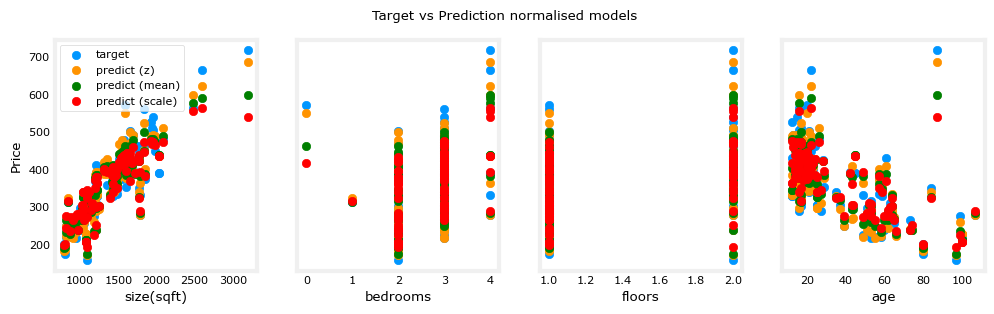

In [49]:
# Calculate the target values and name yp
m = X_norm.shape[0]
yp_z = np.zeros(m)
yp_m = np.zeros(m)
yp_s = np.zeros(m)
for i in range(m):
    yp_z[i] = np.dot(X_norm_z[i], w_norm_z) + b_norm_z
    yp_m[i] = np.dot(X_norm_mean[i], w_norm_m) + b_norm_m
    yp_s[i] = np.dot(X_norm_scale[i], w_norm_s) + b_norm_s

# Plot to visualise
fig, ax = plt.subplots(1, 4, figsize = (12, 3), sharey = True)
for i in range(len(ax)): # four graphs
    ax[i].scatter(X_train[:,i], y_train, label = "target") # original data
    ax[i].set_xlabel(X_features[i])
    ax[i].scatter(X_train[:,i], yp_z, color = dlc["dlorange"], label = "predict (z)") # prediction data
    ax[i].scatter(X_train[:,i], yp_m, color = "green", label = "predict (mean)") # prediction data
    ax[i].scatter(X_train[:,i], yp_s, color = "red", label = "predict (scale)") # prediction data
ax[0].set_ylabel("Price")
ax[0].legend()
fig.suptitle("Target vs Prediction normalised models")
plt.show()

Note: Prediction model seems good as there is a lot of overlap. 

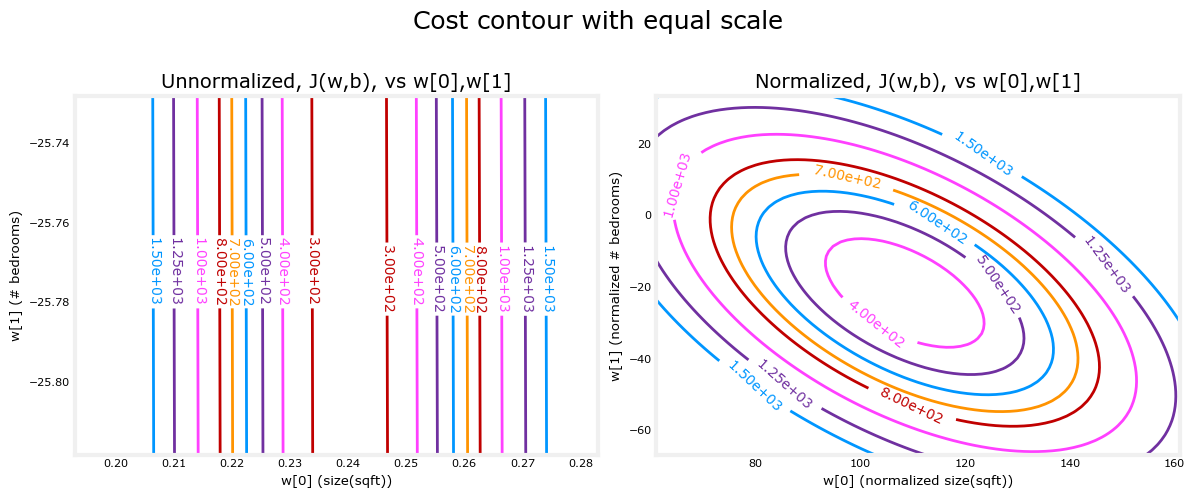

In [50]:
# Visualise contour plots of the cost function in raw and normalised data
plt_equal_scale(X_train, X_norm_z, y_train)